# Regresión logística y el problema de clasificación

La regresión lineal asume que existe una relación lineal entre dos variables $\mathcal{X}$ y $\mathcal{Y}$. Pero esto se viola rápidamente cuando la variable dependiente, $\mathcal{Y}$ es una variable categórica. La **regresión logística** expresa la regresión lineal múltiple en terminos de un logaritmo, superando así la no linealidad. 

La regresión logística es uno de los métodos que se usan para el problema de clasificación. Usualmente se usa para estimar la probabilidad de que una **muestra** sea parte de una clase en particular (por ejemplo, ¿Cuál es la probabilidad de que una persona padeza cancer?). Si la probabilidad estimada es mayor que $50\%$, entonces el modelo predice que la **muestra** pertenece a esa clase y sino entonces predice que no pertenece. Esto es lo que hace en principio un clasificador binario.

Como se mencióno al principio, el modelo de regresión lineal se comporta pobremente cuando la variable $\mathcal{Y}$ es una variable discreta o categórica. Para resolver esto, hay que cambiar la forma de la hipótesis $h_{\theta}(x)$. Para esto se toma la familia de predictores de la forma, 
$$h_{\theta}(x) = \sigma(\theta^\top x) = \frac{1}{1 + e^{\theta^\top x}},$$
donde
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$
es la **función logística** o la **función sigmoide**. Graficamente $\sigma(z)$ luce de la siguiente forma:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [2]:
z = np.arange(-5, 5, 0.2)
g_z = sigmoid(z)

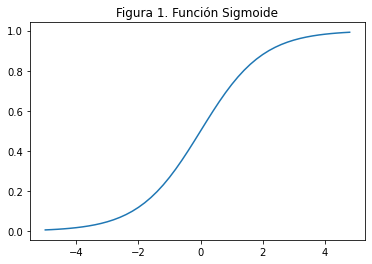

In [3]:
plt.plot(z, g_z)
plt.title('Figura 1. Función Sigmoide')
plt.show()

Observe que $\sigma(z)$ tiene a $1$ cuando $z\to \infty$, y $\sigma(z)$ tiene a $0$ cuándo $z\to -\infty$. Ademas, $\sigma(z)$, y por lo tanto $h_{\theta}$ está acotada entre $0$ y $1$. Acá se sigue manteniendo la convención de que $\theta = (\theta_0, \dots, \theta_n)^{\top}$ y $x=(1, x_1, \dots, x_n)^{\top}$, asi que $\theta^{\top}x=\theta\cdot x$.

### Estimando probabilidades

Considere una conjunto de datos $S=\{(x_i, y_i)\}_{i=1}^m$, donde cada $x_i = (1, x_{i,1}, \dots, x_{i,n})^{\top}$ y cada $y_{i}\in \{0, 1\}$. Bajo estas condiciones, la variable $y_i$ se puede ver como una distribución de Bernoulli para la clasificación binaria. La regresión logística dice que la probabilidad de que la variable $y_i=1$, para $i=1,2, \dots, m$ puede ser modelado así:

$$ h_{\theta}(x_i)=E[y_i\,|\,x_i]=P(y_i=1\,|\,x_i, \theta)=\sigma(\theta^\top x_i)$$


donde $\sigma$ representa la función sigmode. ¿Pero esto por qué es así?

La razón viene de la generalización de los modelos lineales. Dado que $y_i$ es una variable binaria, parece natural la elección de una familia de distribuciones de Bernoulli para el modelo de probabilidad condicional de $y_i$ dado $x_i$. En la formulación de la distribución de Bernoulli como una familia de distribuciones exponenciales, se tiene que $p=\frac{1}{1 + e^{-\eta}}$ donde $\eta = \theta^\top x_i$. Además, observe que si $y_i\,|\, x_i; \theta \sim Ber(p)$, entonces $E[y_i\, |\, x_i]=p$.

Al asumir que $P(y_i=1\,|\,x_i;\theta)=h_{\theta}(x_i)$ y $P(y_i=0\,|\,x_i;\theta)=1 - h_{\theta}(x_i)$. Entonces de forma más compacta se puede escribir que:

$$P(y_i\,|\,x_i; \theta)=(h_{\theta}(x_i))^{y_i}(1-h_{\theta}(x_i))^{1-y_i}.$$

Como desde antes se ha asumido que se tiene un conjunto de entrenamiento con $m$ muestras que se supone han sido generadas independientemente, entonces la verosimilitud de los parámetros se puede expresar como: 

$$L(\theta)=p(y\,|\, X; \theta) = \prod_{i=1}^{m}p(y_i\,|\,x_i; \theta),$$

donde $y=(y_1, \dots, y_m)^{\top}$ y $X$ es la matriz cuyas filas son $x_i^{\top}$ para todo $i=1, \dots, m$.

El objetivo es maximizar la verosimilitud $L(\theta)$, para esto es más fácil maximizar su logaritmo, es decir:

$$l(\theta) = \log L(\theta) = \sum_{i=1}^{m} y_{i}\log h_{\theta}(x_i)+(1+y_i)\log(1 - h_{          \theta}(x_i)).$$

Como en la regresión lineal para encontrar el parámetro $\theta$ hay que minimizar la función de costo, aquí también se mantiene la consistencia, ya que este problema se puede ver como un problema de minimización. Para esto consideramos el costo promedio sobre todo el conjutno de datos. En este caso, se considera $l(\theta)$. La maximización de $l(\theta)$ es equivalente a la minimización de $-l(\theta)$. Y usando la función promedio sobre todo el conjunto de datos, la función de costos para la regresión toma la forma:

$$J(\theta)=-\frac{1}{m}L(\theta)=-\frac{1}{m}\sum_{i=1}^{m}y_{i}\log(h_{\theta}(x_i)) + (1-y_i)\log(1-h_{\theta}(x_i)).$$


Esto nos conduce a entender el costo de un solo dato como $-\log(P(x_i\;|\;y_i))$,, el cual se puede escribir como:

 $$-\log(P(x_i\;|\;y_i))=-\big(y_i\log(h_{\theta}(x_i)) + (1-y_i)\log(1-h_{\theta}(x_i))\big).$$

Esta expresión se puede expresar como una función a tramos, conocida como la **entropía cruzada**, dada por:

$$L_{EC}(h_{\theta}(\theta_i), y_i) = \begin{cases}-\log(h_\theta(x_i)) & \mbox{ si } y_i=1 \\ -\log(1-h_\theta(x_i)) & \mbox{ si } y_i = 0 \end{cases} $$

### La entropía cruzada y el algoritmo del gradiente descendente

El objetivo con el gradiente descendente es encontrar el valor optimo para $\theta$: minimizar la función de costo. En la siguiente ecuación se representa el hecho explicito de la función de costo $J$ paramétrizada por $\theta$.Así el objetivo es encontrar $\theta$ que para todos los ejemplos del conjunto de entrenamiento, $\theta$ es tal que la función de costo se minimiza:

$$
\theta \in \operatorname*{argmin\,\,}_{ \theta\in \Omega} \frac{1}{m}\sum_{i=1}^{m}L_{CE}(f(x_i; \theta), y_i)= \operatorname*{argmin\,\,}_{ \theta\in \Omega} J(\theta).
$$

Para emplear el algoritmo del gradiente descendente es necesario calcular $\nabla_\theta J(\theta)$ de tal manera que al regla de actualización para $\theta$ con base al gradiente es:

$$\theta_{t+1} = \theta_{t} -\eta \nabla J(\theta_t).$$

Teniendo presente la que función de entropía cruzada es:

$$L_{EC}(h_{\theta}(\theta_i), y_i)=-\big(y_i\log(h_{\theta}(x_i)) + (1-y_i)\log(1-h_{\theta}(x_i))\big).$$

Observe que la derivada para esta función en un vector de observación $x_i$ es:

$$ \frac{\partial L_{EC}(h_{\theta}(\theta_i), y_i)}{\partial  \theta_j} = [h_\theta(x_i)-y]x_{i, j}.$$

Note que el gradiente con respeto a $\theta_j$ representa de forma intuitiva, la diferencia entre el valor real $y_i$ y el valor estimado $h_\theta(x_i)$ por la observación $x_i$, multiplicado por el valor correspodiente a $x_{ij}$.Así cada derivada parcial del gradiente es de la forma:

$$\frac{\partial J(\theta)}{\partial \theta_j } = \frac{1}{m}\sum_{i=1}^{m}[h_\theta(x_i)-y_i]x_{i,j}.$$

Finalmente de la ecuación anterior, es fácil concluir que:

$$\nabla_{\theta}J = X^{\top}[\hat{y}-y]$$

en donde $\hat{y} = [h_\theta(x_1),\dots, h_\theta(x_m)]$. 

## Implementación de la regresión logistica con Scikit-learn

Un ejercicio interesante para el lector es hacer la implementación de este módelo desde cero, sin embargo en esta ocasión no lo haremos así y veremos como hacer una implementación sencilla haciendo uso del modulo Scikit-learn de Python.

Para vamos a necesitar los siguiente modulos:

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Cargamos lo datos, en este caso disponemos de un pequeño conjunto de datos que contiene la información básica (genero, edad, y salario estimado) de unos usuarios que compran ciertos productos en una tienda.  El objetivo acá es clasificar los usuarios entre aquellos que compran o no, esto con el objetivo de implementar alguna estrategía comercial

In [5]:
data = pd.read_csv('data.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Para hacernos una pequeña idea de la estructura de los datos, podemos construir varias visualizaciones entre las variables independientes (genero, edad y salario estimado) en relación con la variable objetivo (comprar). Por ejemplo, para la relación entre la _Age_ y _Purchased_ se obtiene el siguiente gráfico:

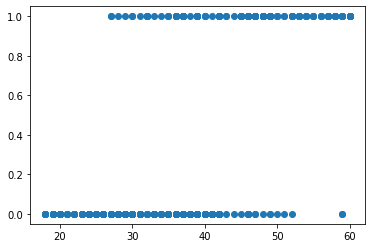

In [6]:
plt.scatter(data.Age, data.Purchased)
plt.show()

Como se puede apreciar los usuarios estan separados en dos clase, entre aquellos que hay comprado y aquellos que no.

Ahora vamos a dividir nuestro datos en dos partes, una parte sera el conjunto de entrenamiento y la otra el conjunto de testeo. Para hacer esto hacemos uso de `train_test_split` que se encuentra en el módulo `sklearn.model_selection`.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data.Age, data.Purchased, test_size=0.20)

Finalmente, hacemos uso de `LogisticRegression` que encuentra en el módulo `sklearn.linear_model` para entrenar nuestro modelo:

In [8]:
model = LogisticRegression()
model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1).ravel())

LogisticRegression()

In [9]:
y_pred = model.predict(X_test.values.reshape(-1, 1))

Una vez se ha estimado la probabilidad $\hat{p}_i=h_\theta(x_i)$ decidir si $x_i$ pertenece a la clase con etiqueta $y_i=1$. Esto se hace con base a la partición de clases que se obtiene al clasicar la probabilidad estimada en clases mediante:

$$\hat{y}_i=
\begin{cases} 
0 & \mbox{ si } \hat{p}_i<0.5; \\ 
1 & \mbox{ si } \hat{p}_i \geq 0.5
\end{cases}$$

Observe que $\sigma(t) < 0$ cuando $t<0$ y $\sigma(t)\geq 0.5$ cuando $t\geq 0$, así, una regresión logistica predice $1$ si $\theta^\top x_i$ es positivo, y $0$ si es negativo.

Analizando la calidad de las prediciones del modelo con los datos de testeo y visualizando los resultados:

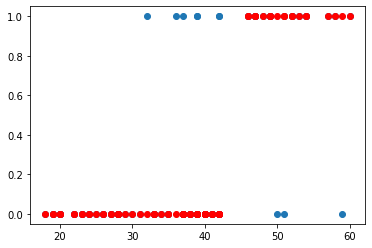

In [10]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c='red')
plt.show()

In [11]:
print(f"Accuracy = {model.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))}")

Accuracy = 0.875


## Bibliografía
* Mustafa Murat Arat. 2019. [Logistic Regression in Tensorflow](https://mmuratarat.github.io/2019-01-07/logistic-regression-in-Tensorflow).
* [Andrew Ng](https://www.andrewng.org). [Machine learning course materials](http://cs229.stanford.edu/materials.html). Technical report, University of Stanford.
* Aurelien Geron. 2019. Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow.

## Contacto
* Participa de la canal de Nerve a través de [Discord](https://discord.gg/edPmghPq8K).
* Se quieres conocer más acerca de este tema me puedes contactar a través de [Classgap](https://www.classgap.com/me/alejandro-sanchez-yali).